### Plotting one-year absolute geolocation error (ALE) of Sentinel-1 IW SLC in CRs (Rosamond, CA)

This jupyter notebook is for plotting ALEs of Sentinel-1 SLC products from Jan 6, 2021 to Dec 14, 2021. Input ALE text files were obtained by applying the same approach as <I><b>ALE_Rosamond_S1A_20210106.ipynb</b></I> and <I><b>ALE_Rosamond_S1B_20210112.ipynb</b></I>.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 18})

In [2]:
%ls ALE_txt/2*txt > tabfile_list   #input text files

In [3]:
#reading text files to pandas dataframe
tabfile = open('tabfile_list', "r")
tab = tabfile.readlines() #read the entire tab
tabfile.close

cnt = 0

for tab_lin in tab:
    try:
        txtfilename = tab_lin.split()
        _df = pd.read_csv(txtfilename[0], sep='\s+', header=None)
        nrows = len(_df)
        
        date_ = txtfilename[0][8:16]
        sensor_ = txtfilename[0][17:20]
    
        _date = [date_ for ii in range(nrows)] 
        _sensor = [sensor_ for ii in range(nrows)] 
        
        dict_ = {'date':_date,'sensor':_sensor,'ALE_Rg':_df.iloc[:,0],
                 'ALE_Az':_df.iloc[:,1], 'slen': _df.iloc[:,2], 'ID': _df.iloc[:,3]}
        
        if cnt == 0:
            df = pd.DataFrame(dict_)
        else:
            _ = pd.DataFrame(dict_)
            df = pd.concat([df, _],ignore_index=True)
            
        cnt += 1
        
    except:
        continue

df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [4]:
df

,date,sensor,ALE_Rg,ALE_Az,slen,ID
0,2021-01-06,S1A,0.095498,0.858437,2.4384,13
1,2021-01-06,S1A,-0.005223,0.164810,2.4384,14
2,2021-01-06,S1A,0.083714,-0.633257,2.4384,15
3,2021-01-06,S1A,0.032507,0.317473,2.4384,16
4,2021-01-06,S1A,-0.047155,0.444984,2.4384,18
...,...,...,...,...,...,...
1060,2021-12-14,S1B,0.246589,-0.488876,0.7000,28
1061,2021-12-14,S1B,-0.092730,0.883975,0.7000,31
1062,2021-12-14,S1B,0.352255,-1.137162,0.7000,33
1063,2021-12-14,S1B,0.067280,-1.601002,0.7000,34


Text(0, 0.5, '$\\Delta$ Azimuth (m)')

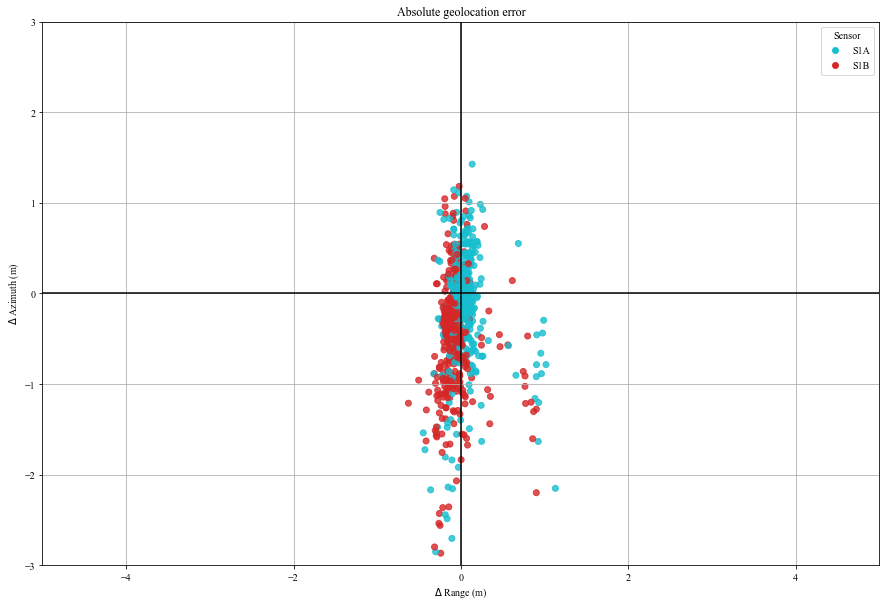

In [5]:
#plotting ALE w.r.t S-1 sensor
fig, ax = plt.subplots(figsize=(15,10))
colors = {'S1A':'tab:cyan', 'S1B':'tab:red'}
sc = ax.scatter(df['ALE_Rg'], df['ALE_Az'], c=df['sensor'].map(colors), alpha=0.8)
handles = [matplotlib.lines.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Sensor', handles=handles)
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-3,3)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Absolute geolocation error')
ax.set_xlabel('$\Delta$ Range (m)')
ax.set_ylabel('$\Delta$ Azimuth (m)')

Text(0, 0.5, '$\\Delta$ Azimuth (m)')

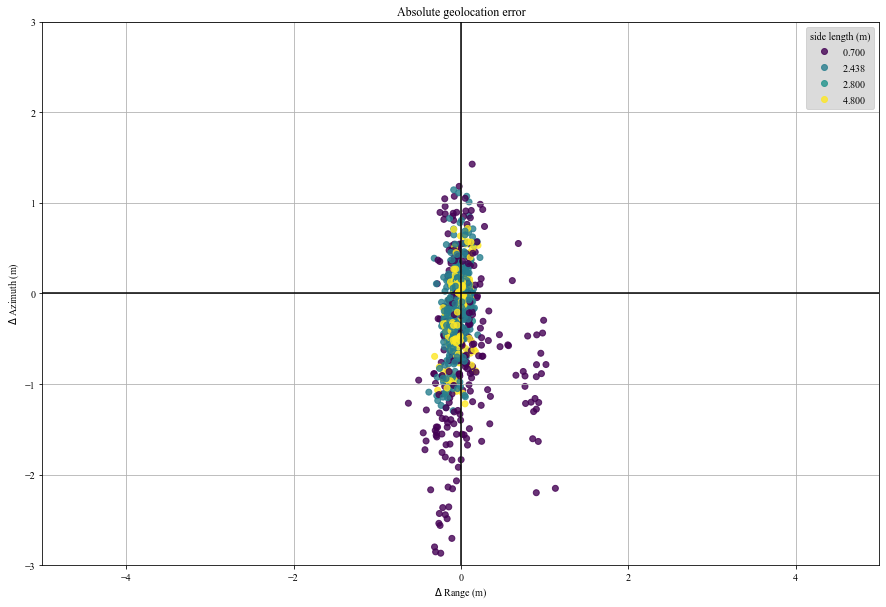

In [6]:
#plotting ALE w.r.t CR size
fig, ax = plt.subplots(figsize=(15,10))
sc = ax.scatter(df['ALE_Rg'], df['ALE_Az'], c=df['slen'], alpha=0.8)
ax.legend(*sc.legend_elements(),facecolor='lightgray')
ax.get_legend().set_title('side length (m)')
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-3,3)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Absolute geolocation error')
ax.set_xlabel('$\Delta$ Range (m)')
ax.set_ylabel('$\Delta$ Azimuth (m)')

In [7]:
print('mean ALE in range: ',np.mean(df['ALE_Rg']), 'std ALE in range: ',np.std(df['ALE_Rg']))
print('mean ALE in azimuth: ',np.mean(df['ALE_Az']), 'std ALE in azimuth: ',np.std(df['ALE_Az']))

mean ALE in range:  -0.013646341830903021 std ALE in range:  0.1820399638146206
mean ALE in azimuth:  -0.3020912422465038 std ALE in azimuth:  0.578957920848946


In [8]:
#excluding CRs with 0.7 m
df = df[df['slen']>0.7]
df = df.reset_index(drop=True)

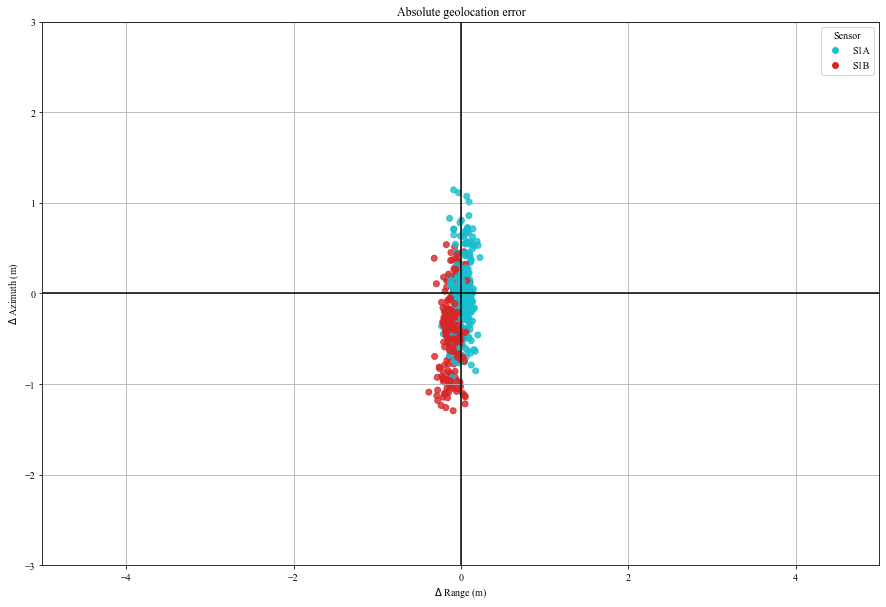

In [9]:
#plotting ALE w.r.t S-1 sensor
fig, ax = plt.subplots(figsize=(15,10))
colors = {'S1A':'tab:cyan', 'S1B':'tab:red'}
sc = ax.scatter(df['ALE_Rg'], df['ALE_Az'], c=df['sensor'].map(colors), alpha=0.8)
handles = [matplotlib.lines.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Sensor', handles=handles)
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-3,3)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Absolute geolocation error')
ax.set_xlabel('$\Delta$ Range (m)')
ax.set_ylabel('$\Delta$ Azimuth (m)')
fig.savefig('ALE_all_sensor.png',dpi=300,bbox_inches='tight')

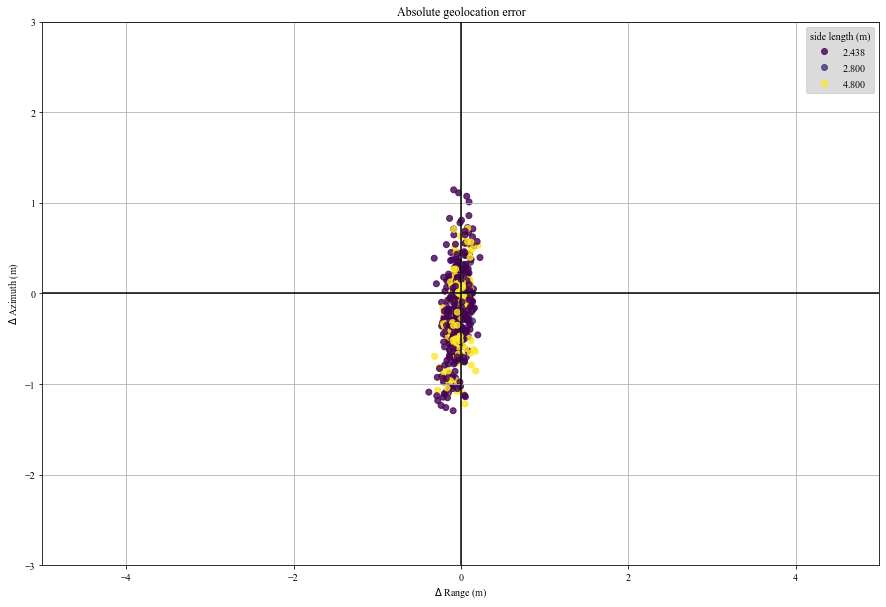

In [10]:
#plotting ALE w.r.t CR size
fig, ax = plt.subplots(figsize=(15,10))
sc = ax.scatter(df['ALE_Rg'], df['ALE_Az'], c=df['slen'], alpha=0.8)
ax.legend(*sc.legend_elements(),facecolor='lightgray')
ax.get_legend().set_title('side length (m)')
ax.grid(True)
ax.set_xlim(-5,5)
ax.set_ylim(-3,3)
ax.axhline(0, color='black')
ax.axvline(0, color='black')
ax.set_title('Absolute geolocation error')
ax.set_xlabel('$\Delta$ Range (m)')
ax.set_ylabel('$\Delta$ Azimuth (m)')
fig.savefig('ALE_slen.png',dpi=300,bbox_inches='tight')

In [11]:
print('mean ALE in range: ',np.mean(df['ALE_Rg']), 'std ALE in range: ',np.std(df['ALE_Rg']))
print('mean ALE in azimuth: ',np.mean(df['ALE_Az']), 'std ALE in azimuth: ',np.std(df['ALE_Az']))

mean ALE in range:  -0.034927206291569084 std ALE in range:  0.09440370251188902
mean ALE in azimuth:  -0.20943656556396203 std ALE in azimuth:  0.3836478864306138
